In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
evaporation= pd.read_csv('../Data/sensor_data.csv')
evaporation.head()

,Timestamp,Soil Moisture (%),Water Level,Temperature (C),Temperature (F),Humidity (%)
0,1731867805,68.4229,0.120302,22,71.6,56
1,1731868277,0.0000,12.242300,22,71.6,55
2,1731868277,0.0000,12.242300,22,71.6,55
3,946684801,100.0000,12.454400,16,60.8,69
4,946684801,100.0000,12.454400,16,60.8,69


#The Timestamp data did not record correcty, and I tried to correct it in excel and got an error. I kept a manual log of when I started and with consistent hourly readings we can get an idea of what these timestamps would be. Lets create a function to make these time stamps.

In [3]:
evaporation_db = evaporation

In [4]:
start_time = pd.Timestamp('2024-11-16 20:00:00')

In [5]:
timestamps = [start_time + pd.Timedelta(hours=i) for i in range(35)]

In [6]:
evaporation_db['Corrected_Timestamp'] = timestamps

In [7]:
evaporation_db['Date'] = evaporation_db['Corrected_Timestamp'].dt.date

In [8]:
evaporation_db['Time'] = evaporation_db['Corrected_Timestamp'].dt.time

In [9]:
evaporation_db = evaporation_db.drop(columns=['Corrected_Timestamp'])

In [10]:
evaporation_db

,Timestamp,Soil Moisture (%),Water Level,Temperature (C),Temperature (F),Humidity (%),Date,Time
0,1731867805,68.4229,0.120302,22,71.6,56,2024-11-16,20:00:00
1,1731868277,0.0000,12.242300,22,71.6,55,2024-11-16,21:00:00
2,1731868277,0.0000,12.242300,22,71.6,55,2024-11-16,22:00:00
3,946684801,100.0000,12.454400,16,60.8,69,2024-11-16,23:00:00
4,946684801,100.0000,12.454400,16,60.8,69,2024-11-17,00:00:00
5,946688402,100.0000,6.453040,16,60.8,69,2024-11-17,01:00:00
6,946688402,100.0000,6.453040,16,60.8,69,2024-11-17,02:00:00
7,946692002,100.0000,5.938810,16,60.8,69,2024-11-17,03:00:00
8,946692002,100.0000,5.938810,16,60.8,69,2024-11-17,04:00:00
9,946695602,100.0000,6.211950,16,60.8,72,2024-11-17,05:00:00


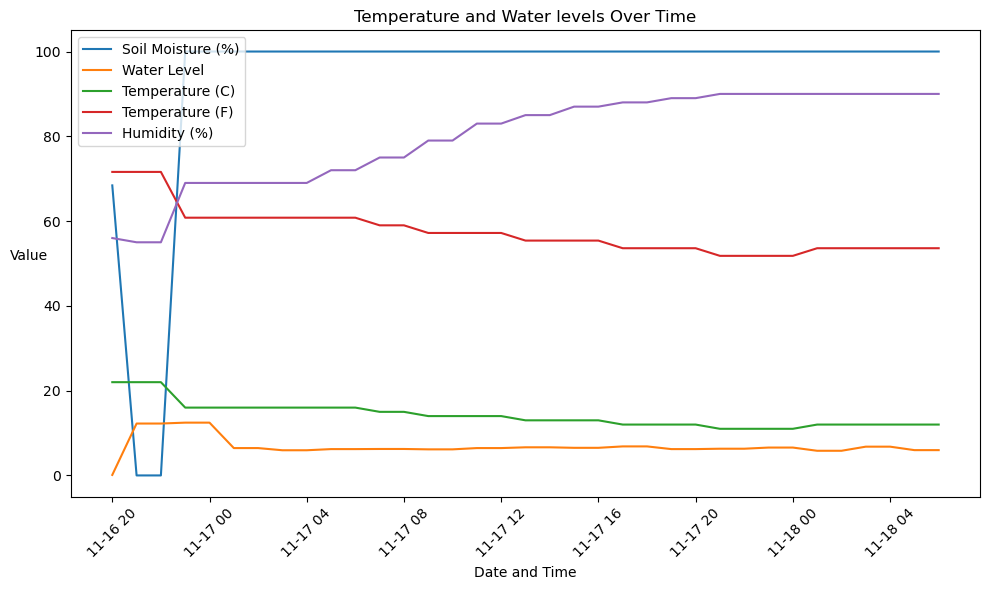

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

evaporation_db['DateTime'] = pd.to_datetime(evaporation_db['Date'].astype(str) + ' ' + evaporation_db['Time'].astype(str))
evaporation_db.set_index('DateTime', inplace=True)

for column in ['Soil Moisture (%)', 'Water Level', 'Temperature (C)', 'Temperature (F)', 'Humidity (%)']:
    ax.plot(evaporation_db.index, evaporation_db[column], label=column)

ax.set_xlabel('Date and Time')
ax.set_ylabel('Value', rotation = 0)
ax.set_title('Temperature and Water levels Over Time')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Our Soil Level never changed, but our water level had sligtly changed showing some evaporation or other disturbances. Some markings can be from myself or others checking the project and making the water move or other non - controlable movements.

The Humidity going up is the only indicater of a change correlation if there is one, but not enough data to proce that

Looking at the projects I believe Changing:
   
   - Too much water in the soil and not mixed well enough. The soil was trapped in layers when removed that stayed in formation from becoming thick sitting in the cup
   
   - This may require mixing the soil during recording data
   
   - Water control to minimize movement
  
  - Start with room temperature water
  
  - Longer time peroid. This project is going to take time, I will need to make its own dedicated power system 
  
  - Colder weather at this time of year